In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/python_statistic/data/rides.csv") #데이터파일 로딩
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


In [2]:
x=df["rides"].values #독립변수(놀이기구 만족도)
y=df["overall"].values #종속변수(전체만족도)

In [3]:
from scipy import stats
result=stats.linregress(x,y) #단순회귀분석 모델 생성
result
# rvalue 58.5% 설명력
# pvalue 95%, 99% 신뢰수준 하에서 유의

LinregressResult(slope=1.7032854834102056, intercept=-94.96224560883252, rvalue=0.5859862820034282, pvalue=1.9715137881102242e-47, stderr=0.10554615174616558)

Text(0, 0.5, '전체 만족도')

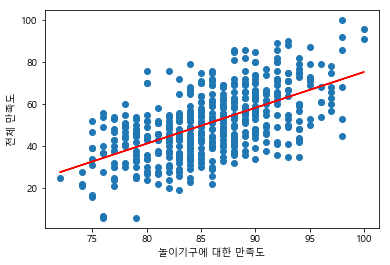

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)


slope,intercept,r_value,p_value,stderr=stats.linregress(x,y)
plt.scatter(x,y) #산점도
plt.plot(x,slope*x+intercept,c="red") #회귀선
plt.xlabel("놀이기구에 대한 만족도")
plt.ylabel("전체 만족도")

In [5]:
90*slope+intercept  #놀이기구에 대한 만족도가 90일 때의 전체만족도는?

58.33344789808598

In [7]:
df2=df.iloc[:, 1:7] #독립변수  
y2=df.iloc[:,7] #종속변수

In [8]:
import statsmodels.formula.api as sm
model=sm.OLS(y2,df2) #다중회귀분석 모델 생성
result=model.fit() #모델훈련(학습)
result.summary() #요약표 출력
#모델의 설명력 95%
#유의하지 않은 변수들
#변수의 중요도

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1569.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          6.59e-318
Time:                        18:13:31   Log-Likelihood:                -1951.2
No. Observations:                 500   AIC:                             3914.
Df Residuals:                     494   BIC:                             3940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num.child      3.1446      0.360      8.737      0.000       2.437       3.852
distance       0.0325      0.016      1.999      0.046       0.001       0.064
rides          0.1401      0.159      0.883      0.378      -0.172       0.452
games          0.0994      0.079      1.265      0.207      -0.055       0.254
wait           0.5648      0.054     10.377      0.000       0.458       0.672
clean         -0.1603      0.167     -0.962      0.336      -0.488       0.167
==============================================================================
Omnibus:                        3.246   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.326
Skew:                           0.186   Prob(JB):                        0.190
Kurtosis:                       2.853   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#유의하지 않은 변수들을 제거한 모델

In [10]:
df2=df.iloc[:, [1,2,5]] #독립변수  
y2=df.iloc[:,7] #종속변수

In [11]:
import statsmodels.formula.api as sm
model=sm.OLS(y2,df2) #다중회귀분석 모델 생성
result=model.fit() #모델훈련(학습)
result.summary() #요약표 출력
#모델의 설명력 95%
#유의하지 않은 변수들
#변수의 중요도 : 자녀수 > 대기시간 > 거리

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3128.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          3.80e-322
Time:                        18:14:31   Log-Likelihood:                -1953.3
No. Observations:                 500   AIC:                             3913.
Df Residuals:                     497   BIC:                             3925.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num.child      3.2246      0.354      9.097      0.000       2.528       3.921
distance       0.0351      0.016      2.178      0.030       0.003       0.067
wait           0.6426      0.013     48.057      0.000       0.616       0.669
==============================================================================
Omnibus:                        3.525   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.572
Skew:                           0.183   Prob(JB):                        0.168
Kurtosis:                       2.807   Cond. No.                         51.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df2=df.iloc[:, 1:7] #독립변수  
y2=df.iloc[:,7] #종속변수

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#전체 데이터셋을 학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(df2,y2,test_size=0.2, random_state=10)
#다중회귀분석 모델을 만들고 모델 훈련(학습)
model=LinearRegression().fit(X_train, y_train)

In [16]:
print(model.score(X_train, y_train)) #학습용 데이터셋의 정확도
print(model.score(X_test, y_test)) #검증용 데이터셋의 정확도

0.6644599841109264
0.7329285624275137
